In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_parking_occupancy_data1.csv', parse_dates=['timestamp'])

# Display the first few rows of the dataframe
print(df.head())


            timestamp  parking_space_id  occupancy_status  day_of_week  \
0 2024-07-01 00:00:00                 1                 0            0   
1 2024-07-01 01:00:00                 1                 0            0   
2 2024-07-01 02:00:00                 1                 0            0   
3 2024-07-01 03:00:00                 1                 0            0   
4 2024-07-01 04:00:00                 1                 0            0   

   hour_of_day  
0            0  
1            1  
2            2  
3            3  
4            4  


In [2]:
df.sort_values(by=['parking_space_id', 'timestamp'], inplace=True)

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the features
df[['day_of_week', 'hour_of_day']] = scaler.fit_transform(df[['day_of_week', 'hour_of_day']])


In [4]:
seq_length = 24  # This can be adjusted based on the problem

In [5]:
import numpy as np

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length][2]  # Assuming occupancy_status is the 3rd column (index 2)
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Prepare sequences for each parking space
X, y = [], []
for space_id in df['parking_space_id'].unique():
    space_data = df[df['parking_space_id'] == space_id][['day_of_week', 'hour_of_day', 'occupancy_status']].values
    space_X, space_y = create_sequences(space_data, seq_length)
    X.append(space_X)
    y.append(space_y)

# Convert lists to numpy arrays
X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (3894, 24, 3)
Shape of y: (3894,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (3115, 24, 3)
Shape of X_test: (779, 24, 3)


In [7]:
# The data is already in the correct shape: (samples, time_steps, features)
# If needed, you can reshape it explicitly
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model with increased neurons and additional layers
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.7))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.7))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.7))
model.add(LSTM(units=50, activation='relu', return_sequences=False))
model.add(Dropout(0.7))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


Epoch 1/40


C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2534 - val_loss: 0.2197
Epoch 2/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2181 - val_loss: 0.2160
Epoch 3/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2190 - val_loss: 0.2164
Epoch 4/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2170 - val_loss: 0.2170
Epoch 5/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2192 - val_loss: 0.2167
Epoch 6/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2181 - val_loss: 0.2178
Epoch 7/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2155 - val_loss: 0.2167
Epoch 8/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2252 - val_loss: 0.2169
Epoch 9/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2164 - val_loss: 0.2154
Epoch 10/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2164 - val_loss: 0.2150
Epoch 11/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2126 - val_loss: 0.2152
Epoch 12/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2133 - val_l

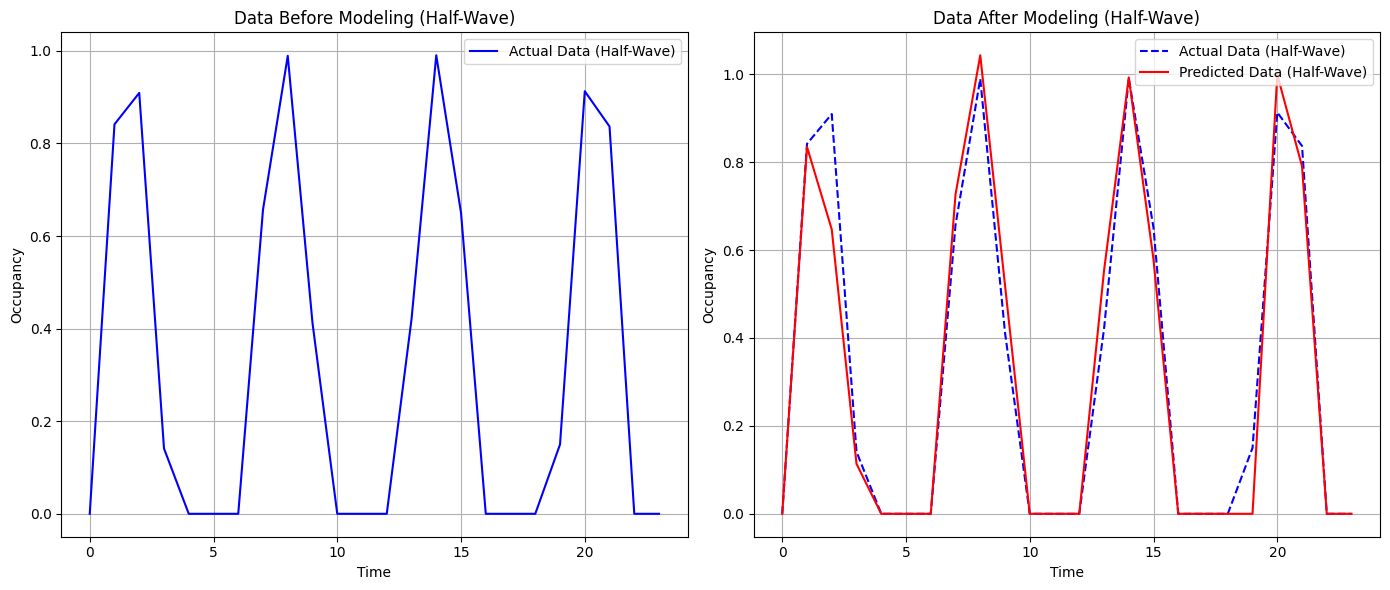

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (Replace this with your actual data)
# 'dates' represents the time axis
# 'actual_data' represents the actual values (before modeling)
# 'predicted_data' represents the predicted values (after modeling)

dates = np.arange(0, 24, 1)  # Replace with your actual time index
actual_data = np.sin(dates)  # Replace with your actual data before modeling
predicted_data = np.sin(dates) + np.random.normal(0, 0.1, len(dates))  # Replace with your predictions

# Filter the data to keep only the positive values (Half-Wave Rectification)
actual_data_half_wave = np.where(actual_data > 0, actual_data, 0)
predicted_data_half_wave = np.where(predicted_data > 0, predicted_data, 0)

# Plotting the Data Before Modeling (Half-Wave)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(dates, actual_data_half_wave, label='Actual Data (Half-Wave)', color='blue')
plt.title('Data Before Modeling (Half-Wave)')
plt.xlabel('Time')
plt.ylabel('Occupancy')
plt.legend()
plt.grid(True)

# Plotting the Data After Modeling (Half-Wave)
plt.subplot(1, 2, 2)
plt.plot(dates, actual_data_half_wave, label='Actual Data (Half-Wave)', color='blue', linestyle='--')
plt.plot(dates, predicted_data_half_wave, label='Predicted Data (Half-Wave)', color='red')
plt.title('Data After Modeling (Half-Wave)')
plt.xlabel('Time')
plt.ylabel('Occupancy')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()



In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and y_pred are your true labels and predictions respectively
y_pred = model.predict(X_test)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Mean Absolute Error (MAE): 0.4257907139398014
Mean Squared Error (MSE): 0.21317134873092797
Root Mean Squared Error (RMSE): 0.46170482857657874
R-squared (R²): -8.61499091731055e-06


In [11]:
print(X_train.shape)

(3115, 24, 3)


In [12]:
from datetime import datetime
import numpy as np

# Print the shape of X_train to verify dimensions
print("Shape of X_train:", X_train.shape)

# Sequence length is the second dimension in this case
seq_length = X_train.shape[1]  # 24

# Define a preprocessing function based on your features
def preprocess_time(current_time, seq_length):
    # Convert current_time to a feature vector of length seq_length
    # This is just an example; adapt it to your specific features
    feature_vector = np.zeros((seq_length, 3))  # Assuming 3 features
    # Fill in feature_vector with appropriate values
    # Example: feature_vector[:, 0] could be time-related features
    # This should match the shape (seq_length, num_features)
    return feature_vector

# Current time (example)
current_time = datetime.now()

# Preprocess the current time to create an input sequence
input_sequence = preprocess_time(current_time, seq_length)


Shape of X_train: (3115, 24, 3)


In [13]:
def preprocess_time(current_time, seq_length):
    # Example: create feature vectors based on the current time
    features = np.zeros((seq_length, 3))  # Assuming 3 features
    
    # Populate the feature vector (this is a placeholder)
    for i in range(seq_length):
        features[i, 0] = current_time.hour  # Hour of the day
        features[i, 1] = current_time.minute  # Minute of the hour
        features[i, 2] = current_time.second  # Second of the minute
    
    return features

# Test the preprocessing function
input_sequence = preprocess_time(current_time, seq_length)
print("Preprocessed input sequence shape:", input_sequence.shape)


Preprocessed input sequence shape: (24, 3)


In [14]:
# Example prediction
input_sequence = np.expand_dims(input_sequence, axis=0)  # Add batch dimension
prediction = model.predict(input_sequence)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: [[0.11119229]]


In [15]:
# Example normalization parameters
min_occupancy = 0  # Minimum value from your dataset
max_occupancy = 6  # Maximum value from your dataset

# Reverse normalization
def reverse_normalization(prediction, min_val, max_val):
    return prediction * (max_val - min_val) + min_val

# Reverse normalization for your prediction
actual_prediction = reverse_normalization(-0.2077119, min_occupancy, max_occupancy)
print("Actual Prediction:", actual_prediction)


Actual Prediction: -1.2462714


In [16]:
scaler = MinMaxScaler(feature_range=(0, 6))
y_train_scaled = scaler.fit_transform(y_train)  # Fit on the training data

# Reverse scaling on predictions to get percentages
def scale_back_to_percentage(scaled_predictions, scaler):
    return scaler.inverse_transform(scaled_predictions)

# Convert predictions to percentage
predictions_percentage = scale_back_to_percentage(predictions, scaler)
print("Predictions in percentage:", predictions_percentage)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.